In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [3]:
imagePaths = []
for dirname, _, filenames in os.walk('Resultado GAN'):
    for filename in filenames:
        imagePaths.append(os.path.join(dirname, filename))

In [4]:
 len(imagePaths)

1776

In [5]:
 imagePaths[0]

'Resultado GAN\\healthy\\Generated\\1.tiff'

In [6]:
#Taking the images from the folder and resizing to 128x128 RGB
#labeling them from ['healthy', 'mild', 'moderate', 'severe'] to -> [0,1,2,3]
new_img_height = 128
new_img_width = 128
channels = 3
all_labels = ['healthy', 'mild', 'moderate', 'severe']
original_data_x = []
original_data_y = []
for imagePath in tqdm(imagePaths):
    if imagePath.split(os.path.sep)[-2] != 'Generated':
        continue
    label = all_labels.index(imagePath.split(os.path.sep)[-3])
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (new_img_height, new_img_width))
    original_data_x.append(image)
    original_data_y.append(label)

100%|█████████████████████████████████████████████████████████████████████████████| 1776/1776 [00:04<00:00, 427.13it/s]


In [7]:
imagePaths = []

In [8]:
import sys
import random
def shuffle_dataset(data_x, data_y):
    new_data = []
    for i in range(len(data_x)):
        new_data.append((data_x[i], data_y[i]))
    random.shuffle(new_data)
    new_data_x = []
    new_data_y = []
    for i in range(len(new_data)):
        new_data_x.append(new_data[i][0])
        new_data_y.append(new_data[i][1])
    return new_data_x, new_data_y

In [9]:
original_data_x, original_data_y = shuffle_dataset(original_data_x, original_data_y)

In [10]:
np.save('data_x_original.npy', original_data_x)
np.save('data_y_original.npy', original_data_y)

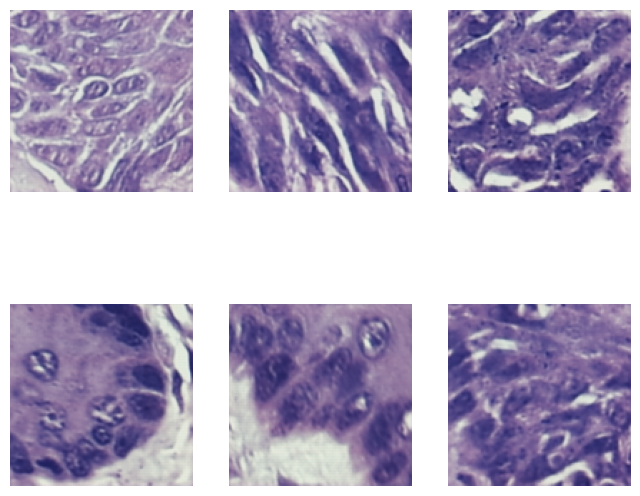

In [11]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = original_data_x[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image/255)
    plt.axis("off")

## **Image Cropping**

# **Data Augmentation**



In [26]:
#cria cópias com rotação de 90 graus
rot_x = []
rot_y = []
for i in range(len(original_data_x)):
    rot_x.append(cv2.rotate(original_data_x[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
    rot_y.append(original_data_y[i])

In [27]:
#cria cópias com rotação de 90 graus
rot_x = []
rot_y = []
for i in range(len(original_data_x)):
    rot_x.append(cv2.rotate(original_data_x[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
    rot_y.append(original_data_y[i])

In [28]:
#cria cópias espelhadas horizontalmente
flip1_x = []
flip1_y = []
for i in range(len(original_data_x)):
    flip1_x.append(cv2.flip(original_data_x[i], 1))
    flip1_y.append(original_data_y[i])

In [29]:
#cria cópias espelhadas verticalmente
flip2_x = []
flip2_y = []
for i in range(len(original_data_x)):
    flip2_x.append(cv2.flip(original_data_x[i], 0))
    flip2_y.append(original_data_y[i])

In [30]:
#concatena as imagens formadas no array principal
new_data_x = [*original_data_x,*rot_x,*flip1_x, *flip2_x]
new_data_y = [*original_data_y,*rot_y,*flip1_y, *flip2_y]

# **Random Flip and Rotate**

In [32]:
from keras import layers

In [33]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])

In [34]:
random_flip_images_x = []
random_flip_images_y = []
for i in range(len(original_data_x)):
    image = original_data_x[i]
    label = original_data_y[i]
    random_flip_images_x.append(image)
    random_flip_images_y.append(label)
    for j in range(6):
        augmented_image = data_augmentation(image)
        random_flip_images_x.append(augmented_image)
        random_flip_images_y.append(label)

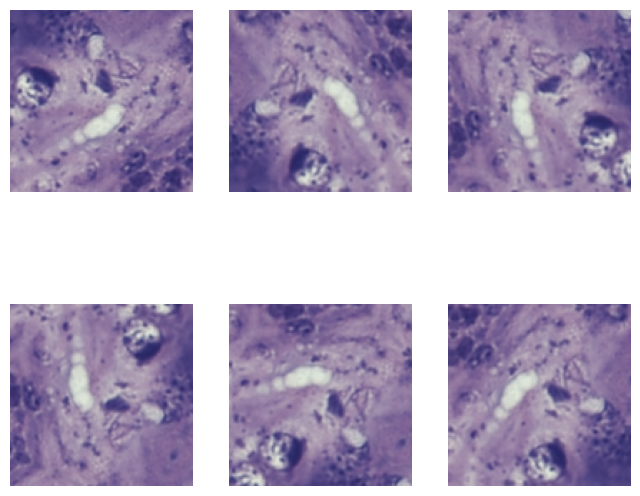

In [39]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = random_flip_images_x[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image/255)
    plt.axis("off")

In [37]:
print('random_x size:', len(random_flip_images_x))
print('random label size:', len(random_flip_images_y))

random_x size: 4144
random label size: 4144


In [40]:
print('Data_x size:', len(new_data_x))
print('Data label size:', len(new_data_y))

Data_x size: 2368
Data label size: 2368


In [41]:
import pandas as pd

In [42]:
pd.Series(new_data_y).value_counts()

0    592
1    592
2    592
3    592
Name: count, dtype: int64

In [43]:
# fig = plt.figure(figsize=(5, 5))
# for i in range(1, (old_img_height//new_img_height)*(old_img_width//new_img_width)+1):
#     fig.add_subplot((old_img_height//new_img_height), (old_img_width//new_img_width), i)
#     #im = np.transpose(data_x[i - 1], (2, 0, 1))
#     #im = data_x[i-1]
#     plt.imshow(data_x[i-1])
#     plt.axis('off')
#     fig.tight_layout(pad=0.2)

In [45]:
#shuffling the final dataset
new_data_x, new_data_y = shuffle_dataset(new_data_x, new_data_y)

In [46]:
random_flip_images_x, random_flip_images_y = shuffle_dataset(random_flip_images_x, random_flip_images_y)

In [47]:
len(new_data_x), len(new_data_y)

(2368, 2368)

In [48]:
pd.Series(new_data_y).value_counts()

3    592
1    592
2    592
0    592
Name: count, dtype: int64

In [49]:
np.save('data_x_aumentated.npy', new_data_x)
np.save('data_y_aumentated.npy', new_data_y)

In [50]:
new_data_x = [i/255.0 for i in new_data_x]
np.save('data_x_aumentated_normalized.npy', new_data_x)
np.save('data_y_aumentated_normalized.npy', new_data_y)

In [51]:
random_flip_images_x = [i/255.0 for i in random_flip_images_x]
np.save('data_x_random_flip.npy', random_flip_images_x)
np.save('data_y_random_flip.npy', random_flip_images_y)